In [159]:
from itertools import product as product
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from math import sqrt as sqrt
import matplotlib.pyplot as plt


class PriorBox(object):
    def __init__(self):
        super(PriorBox, self).__init__()
        self.image_size = 300
        self.feature_maps = [38, 19, 10, 5, 3, 1]
        self.steps = [8, 16, 32, 64, 100, 300]
        self.min_sizes = [30, 60, 111, 162, 213, 264]
        self.max_sizes = [60, 111, 162, 213, 264, 315]
        self.aspect_ratios = [[2], [2, 3], [2, 3], [2, 3], [2], [2]]

    def forward(self):
        mean = []
        for k, f in enumerate(self.feature_maps):
            for i, j in product(range(f), repeat=2):
                f_k = self.image_size / self.steps[k]
                cx = (j + 0.5) / f_k
                cy = (i + 0.5) / f_k
                s_k = self.min_sizes[k]/self.image_size
                mean += [cx, cy, s_k, s_k]
                s_k_prime = sqrt(s_k * (self.max_sizes[k]/self.image_size))
                mean += [cx, cy, s_k_prime, s_k_prime]
                for ar in self.aspect_ratios[k]:
                    mean += [cx, cy, s_k*sqrt(ar), s_k/sqrt(ar)]
                    mean += [cx, cy, s_k/sqrt(ar), s_k*sqrt(ar)]
        print(torch.Tensor(mean).shape)
        output = torch.Tensor(mean).view(-1, 4)
        print(output.shape)
        output.clamp_(max=1, min=0)
        return output

In [173]:
dbox = PriorBox()
d_box_list = dbox.forward()
box_coordinate = np.zeros((len(d_box_list), 4, 2))

torch.Size([34928])
torch.Size([8732, 4])


In [174]:
d_box_list

tensor([[0.0133, 0.0133, 0.1000, 0.1000],
        [0.0133, 0.0133, 0.1414, 0.1414],
        [0.0133, 0.0133, 0.1414, 0.0707],
        ...,
        [0.5000, 0.5000, 0.9612, 0.9612],
        [0.5000, 0.5000, 1.0000, 0.6223],
        [0.5000, 0.5000, 0.6223, 1.0000]])

In [155]:
a = (np.array(feature_maps)**2)

In [156]:
a.sum()

1940

In [161]:
feature_maps = [38, 19, 10, 5, 3, 1]

In [171]:
d_box_list = d_box_list.numpy()

In [172]:
np.flip(d_box_list)

array([[1.        , 0.62225395, 0.5       , 0.5       ],
       [0.62225395, 1.        , 0.5       , 0.5       ],
       [0.9612492 , 0.9612492 , 0.5       , 0.5       ],
       ...,
       [0.07071068, 0.14142136, 0.01333333, 0.01333333],
       [0.14142136, 0.14142136, 0.01333333, 0.01333333],
       [0.1       , 0.1       , 0.01333333, 0.01333333]], dtype=float32)

In [158]:
d_box_list.shape

torch.Size([8732, 4])

In [140]:
for i in reversed(range(1, len(feature_maps))   ):
    print(i)

6
5
4
3
2
1


In [145]:
dbox_divided = []
for i in reversed(range(1, len(feature_maps))   ):
    print(feature_maps[i]**2, feature_maps[i-1]**2)
    dbox_divided.append(d_box_list[feature_maps[i]**2:feature_maps[i-1]**2] )

0 1
1 9
9 25
25 100
100 361
361 1444


In [146]:
for i in range(len(dbox_divided)):
    print(len(dbox_divided[i]))

1
8
16
75
261
1083


In [147]:
d_box_list = dbox_divided[0]
box_coordinate = np.zeros((len(d_box_list), 4, 2))

In [148]:
for i in range(len(d_box_list)):
    box_coordinate[i][0] = d_box_list[i][:2] + np.array([-d_box_list[i][2]/2, -d_box_list[i][3]/2])
    box_coordinate[i][1] = d_box_list[i][:2] + np.array([-d_box_list[i][2]/2, d_box_list[i][3]/2])
    box_coordinate[i][2] = d_box_list[i][:2] + np.array([d_box_list[i][2]/2, d_box_list[i][3]/2])
    box_coordinate[i][3] = d_box_list[i][:2] + np.array([d_box_list[i][2]/2, -d_box_list[i][3]/2])




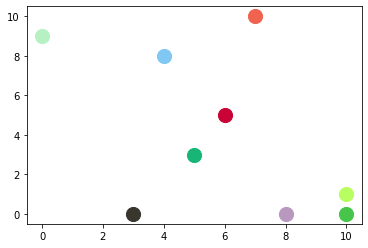

In [93]:
import matplotlib.pyplot as plt
import random

number_of_colors = 9

hexadecimal_alphabets = '0123456789ABCDEF'

color_list = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in
range(6)]) for i in range(number_of_colors)]

for i in range(number_of_colors):
   plt.scatter(random.randint(0, 10), random.randint(0, 10), c=color[i], s=200)

plt.show()

In [94]:
color_list

['#B9FE61',
 '#F0644F',
 '#17B676',
 '#B7F1C3',
 '#38362D',
 '#B998C0',
 '#C90336',
 '#47C54A',
 '#80C8F3']

In [96]:
number_of_colors = 9

hexadecimal_alphabets = '0123456789ABCDEF'

color_list = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in
range(6)]) for i in range(number_of_colors)]

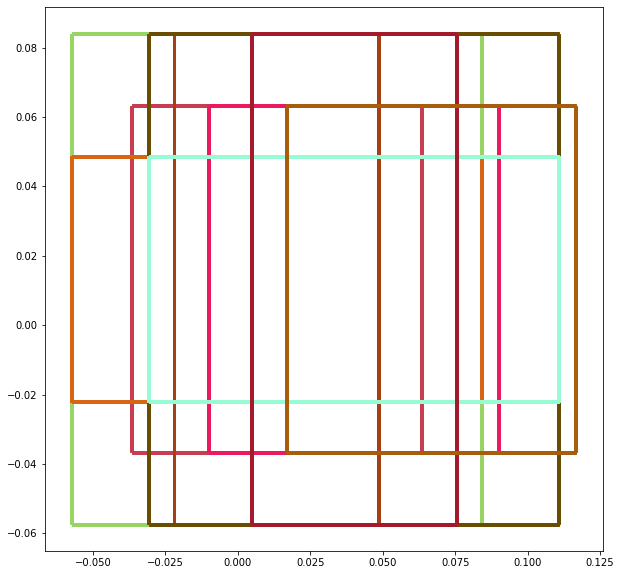

In [97]:
plt.figure(figsize=(10, 10))
for i in range(len(d_box_list)):
    plt.arrow(box_coordinate[i][0][0], box_coordinate[i][0][1], box_coordinate[i][1][0]-box_coordinate[i][0][0], box_coordinate[i][1][1]-box_coordinate[i][0][1], width=0.001, head_width=0, color=color_list[i])
    plt.arrow(box_coordinate[i][1][0], box_coordinate[i][1][1], box_coordinate[i][2][0]-box_coordinate[i][1][0], box_coordinate[i][2][1]-box_coordinate[i][1][1], width=0.001, head_width=0, color=color_list[i])
    plt.arrow(box_coordinate[i][2][0], box_coordinate[i][2][1], box_coordinate[i][3][0]-box_coordinate[i][2][0], box_coordinate[i][3][1]-box_coordinate[i][2][1], width=0.001, head_width=0, color=color_list[i])
    plt.arrow(box_coordinate[i][3][0], box_coordinate[i][3][1], box_coordinate[i][0][0]-box_coordinate[i][3][0], box_coordinate[i][0][1]-box_coordinate[i][3][1], width=0.001, head_width=0, color=color_list[i])

plt.show()



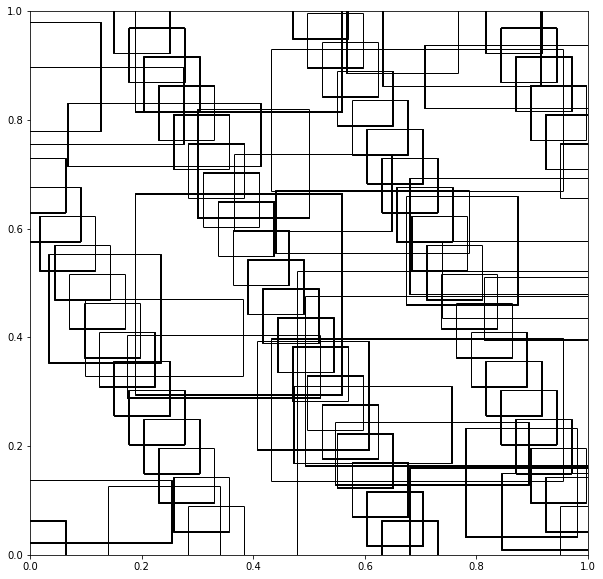

In [74]:
plt.figure(figsize=(10, 10))
for i in range(0, len(d_box_list), 100):
    plt.arrow(box_coordinate[i][0][0], box_coordinate[i][0][1], box_coordinate[i][1][0]-box_coordinate[i][0][0], box_coordinate[i][1][1]-box_coordinate[i][0][1], width=0.001, head_width=0, color='black')
    plt.arrow(box_coordinate[i][1][0], box_coordinate[i][1][1], box_coordinate[i][2][0]-box_coordinate[i][1][0], box_coordinate[i][2][1]-box_coordinate[i][1][1], width=0.001, head_width=0, color='black')
    plt.arrow(box_coordinate[i][2][0], box_coordinate[i][2][1], box_coordinate[i][3][0]-box_coordinate[i][2][0], box_coordinate[i][3][1]-box_coordinate[i][2][1], width=0.001, head_width=0, color='black')
    plt.arrow(box_coordinate[i][3][0], box_coordinate[i][3][1], box_coordinate[i][0][0]-box_coordinate[i][3][0], box_coordinate[i][0][1]-box_coordinate[i][3][1], width=0.001, head_width=0, color='black')

plt.xlim(0, 1)    
plt.ylim(0, 1)
plt.show()


In [36]:
dbox_divided

[tensor([], size=(0, 4)),
 tensor([], size=(0, 4)),
 tensor([], size=(0, 4)),
 tensor([], size=(0, 4)),
 tensor([], size=(0, 4))]

In [27]:
feature_maps = [38, 19, 10, 5, 3, 1]
cnt = 0
for k, f in enumerate(feature_maps):
    for i, j in product(range(f), repeat=2):
        cnt = cnt + 1
        print(i, j)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21


6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
11 16
11 17
11 18
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15
12 16
12 17
12 18
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
13 15
13 16
13 17
13 18
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
14 15
14 16
14 17
14 18
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15
15 16
15 17
15 18
16 0
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
16 12
16 13
16

In [28]:
cnt

1940

In [24]:
d_box_list.shape

torch.Size([8732, 4])

In [17]:
range(5)

range(0, 5)

In [16]:
for i, j in product(range(5), repeat=2):
    print(i, j)

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4


ValueError: too many values to unpack (expected 2)

In [4]:
dbox = PriorBox()
d_box_list = dbox.forward()
box_coordinate = np.zeros((len(d_box_list), 4, 2))

for i in range(len(d_box_list)):
    box_coordinate[i][0] = d_box_list[i][:2] + np.array([-d_box_list[i][2]/2, -d_box_list[i][3]/2])
    box_coordinate[i][1] = d_box_list[i][:2] + np.array([-d_box_list[i][2]/2, d_box_list[i][3]/2])
    box_coordinate[i][2] = d_box_list[i][:2] + np.array([d_box_list[i][2]/2, d_box_list[i][3]/2])
    box_coordinate[i][3] = d_box_list[i][:2] + np.array([d_box_list[i][2]/2, -d_box_list[i][3]/2])





In [10]:
d_box_list.shape

torch.Size([8732, 4])

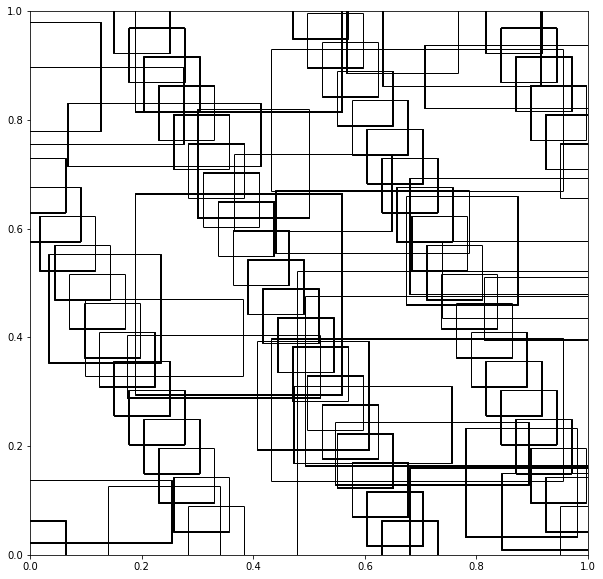

In [8]:
plt.figure(figsize=(10, 10))
for i in range(0, len(d_box_list), 100):
    plt.arrow(box_coordinate[i][0][0], box_coordinate[i][0][1], box_coordinate[i][1][0]-box_coordinate[i][0][0], box_coordinate[i][1][1]-box_coordinate[i][0][1], width=0.001, head_width=0, color='black')
    plt.arrow(box_coordinate[i][1][0], box_coordinate[i][1][1], box_coordinate[i][2][0]-box_coordinate[i][1][0], box_coordinate[i][2][1]-box_coordinate[i][1][1], width=0.001, head_width=0, color='black')
    plt.arrow(box_coordinate[i][2][0], box_coordinate[i][2][1], box_coordinate[i][3][0]-box_coordinate[i][2][0], box_coordinate[i][3][1]-box_coordinate[i][2][1], width=0.001, head_width=0, color='black')
    plt.arrow(box_coordinate[i][3][0], box_coordinate[i][3][1], box_coordinate[i][0][0]-box_coordinate[i][3][0], box_coordinate[i][0][1]-box_coordinate[i][3][1], width=0.001, head_width=0, color='black')

plt.xlim(0, 1)    
plt.ylim(0, 1)
plt.show()


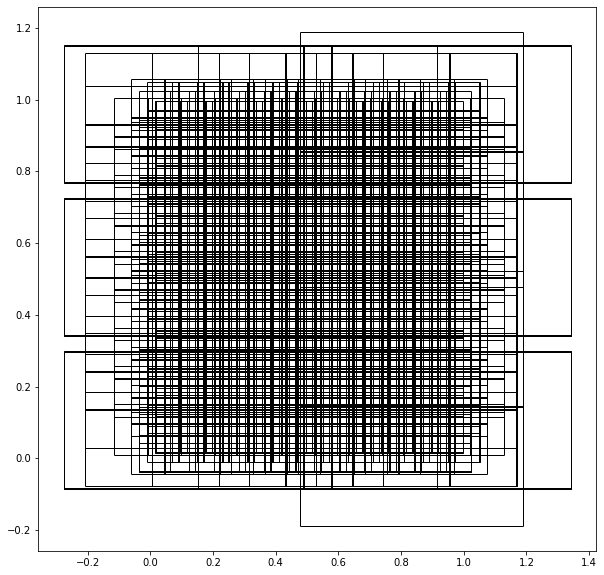

In [75]:
plt.figure(figsize=(10, 10))
for i in range(0, len(d_box_list), 12):
    plt.arrow(box_coordinate[i][0][0], box_coordinate[i][0][1], box_coordinate[i][1][0]-box_coordinate[i][0][0], box_coordinate[i][1][1]-box_coordinate[i][0][1], width=0.001, head_width=0, color='black')
    plt.arrow(box_coordinate[i][1][0], box_coordinate[i][1][1], box_coordinate[i][2][0]-box_coordinate[i][1][0], box_coordinate[i][2][1]-box_coordinate[i][1][1], width=0.001, head_width=0, color='black')
    plt.arrow(box_coordinate[i][2][0], box_coordinate[i][2][1], box_coordinate[i][3][0]-box_coordinate[i][2][0], box_coordinate[i][3][1]-box_coordinate[i][2][1], width=0.001, head_width=0, color='black')
    plt.arrow(box_coordinate[i][3][0], box_coordinate[i][3][1], box_coordinate[i][0][0]-box_coordinate[i][3][0], box_coordinate[i][0][1]-box_coordinate[i][3][1], width=0.001, head_width=0, color='black')

plt.show()


